In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline

In [2]:
yelp_raw = pd.read_csv('yelp_labelled.txt', sep='\t', header=None, names=['reviews', 'boolean'])
yelp_raw.head()

,reviews,boolean
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
yelp_raw.describe(include='all')

,reviews,boolean
count,1000,1000.00000
unique,996,NaN
top,I would not recommend this place.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [4]:
yelp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
reviews    1000 non-null object
boolean    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [5]:
yelp_raw['reviews'].astype('str')

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
13     I tried the Cape Cod ravoli, chicken,with cran...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
16                                   Highly recommended.
17                Waitress was 

In [6]:
yelp_raw['reviews'] = yelp_raw['reviews'].str.lower()

In [7]:
yelp_raw2 = yelp_raw.copy()

In [8]:
keywords = ['wow', 'love', 'good', 'ever', 'great', 'well', 'like', 'recommended', 'delicious', 'amazing', 'performed', 'back', 'friendly', 'exellent']

**This is classifier No.1**

In [9]:
for key in keywords:
    yelp_raw[str(key)] = yelp_raw.reviews.str.contains(str(key), case=False)

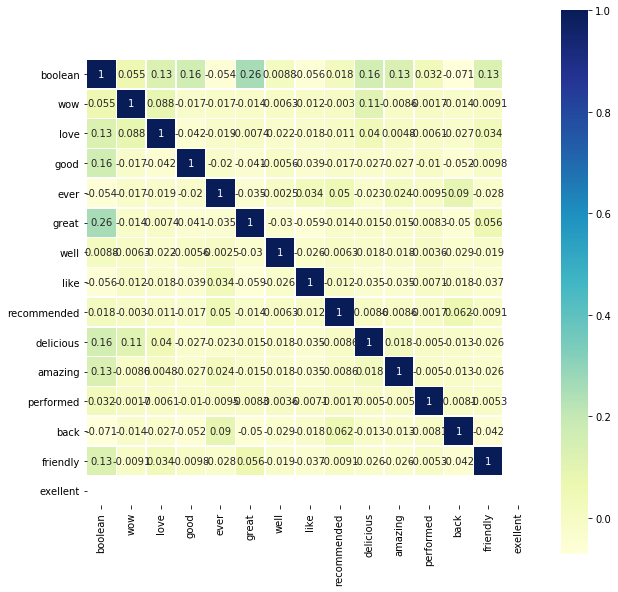

In [10]:
yelp_corr = yelp_raw.corr()

plt.figure(figsize=(10,10))
sns.heatmap(yelp_corr, square=True, linewidths=0.5, annot=True, cmap='YlGnBu')
plt.show()

In [11]:
yelp_raw.drop('reviews', axis=1, inplace=True)

In [12]:
data = yelp_raw[keywords]
target = yelp_raw['boolean']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)
print("The first classifier's number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

The first classifier's number of mislabeled points out of a total 1000 points : 314


Let's calculate the accuracy of my model

In [13]:
print("The accuracy of this model is {}%".format(round(((target == y_pred).sum() / data.shape[0])*100), 2))

The accuracy of this model is 69.0%


Now, Let's build confusion matrix and calculate sensitivity and specificity.

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, y_pred)

cm_sense = cm[1][1] / cm[1].sum()
print('The Sensitivity of my model is {}%'.format(cm_sense*100))

cm_spec = cm[0][0] / cm[0].sum()
print('The Specificity of my model is {}%'.format(cm_spec*100))

The Sensitivity of my model is 43.6%
The Specificity of my model is 93.60000000000001%


Now, let's cross-validation check for the model

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
bnb_yelp = bnb.fit(X_train, y_train)
print('With 20% Holdout: ' + str(bnb_yelp.score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.7
Testing on Sample: 0.686


In [16]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(bnb, data, target, cv=10)
print(cvs)
print('The average of Cross-validation score is {}'.format(round(cvs.mean(), 2)))

[0.67 0.67 0.69 0.76 0.64 0.65 0.65 0.7  0.65 0.72]
The average of Cross-validation score is 0.68


**This is classifier No.2**

In [17]:
for key in keywords:
    yelp_raw2[str(key)] = yelp_raw2.reviews.str.contains(str(key), case=False) & ~yelp_raw2.reviews.str.contains('not', case=False) & ~yelp_raw2.reviews.str.contains('worst', case=False)

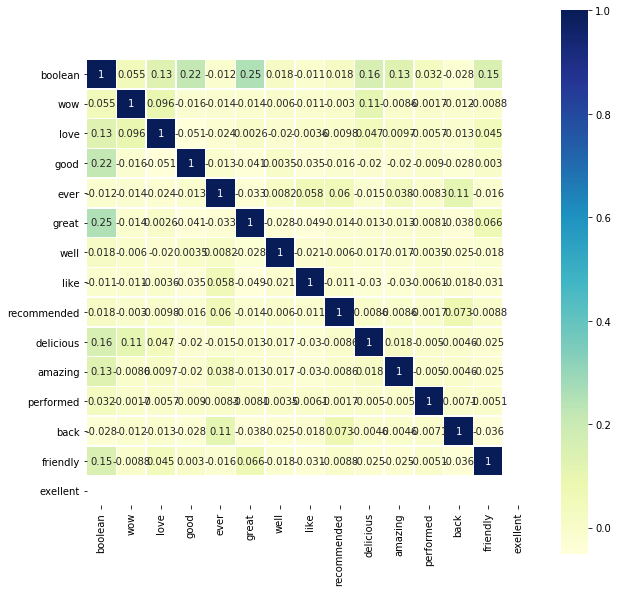

In [18]:
yelp_corr2 = yelp_raw2.corr()

plt.figure(figsize=(10,10))
sns.heatmap(yelp_corr2, square=True, linewidths=0.5, annot=True, cmap='YlGnBu')
plt.show()

In [19]:
yelp_raw2.drop('reviews', axis=1, inplace=True)

In [20]:
data2 = yelp_raw2[keywords]
target2 = yelp_raw2['boolean']

from sklearn.naive_bayes import BernoulliNB
bnb2 = BernoulliNB()
y_pred2 = bnb2.fit(data2, target2).predict(data2)
print("The second classifier's number of mislabeled points out of a total {} points : {}".format(data2.shape[0], (target2 != y_pred2).sum()))

The second classifier's number of mislabeled points out of a total 1000 points : 307


Let's calculate the accuracy of my model

In [21]:
print("The accuracy of this model is {}%".format(round(((target2 == y_pred2).sum() / data2.shape[0])*100), 2))

The accuracy of this model is 69.0%


Now, Let's build confusion matrix and calculate sensitivity and specificity.

In [22]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(target2, y_pred2)

cm2_sense = cm2[1][1] / cm2[1].sum()
print('The Sensitivity of my second model is {}%'.format(cm2_sense*100))

cm2_spec = cm2[0][0] / cm2[0].sum()
print('The Specificity of my second model is {}%'.format(cm2_spec*100))

The Sensitivity of my second model is 41.6%
The Specificity of my second model is 97.0%


Now, let's cross-validation check for the model

In [23]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.2, random_state=20)
bnb2_yelp = bnb2.fit(X_train2, y_train2)
print('With 20% Holdout: ' + str(bnb2_yelp.score(X_test2, y_test2)))
print('Testing on Sample: ' + str(bnb2.fit(data2, target2).score(data2, target2)))

With 20% Holdout: 0.705
Testing on Sample: 0.693


In [24]:
from sklearn.model_selection import cross_val_score

cvs2 = cross_val_score(bnb2, data2, target2, cv=10)
print(cvs2)
print('The average of Cross-validation score is {}'.format(round(cvs2.mean(), 2)))

[0.7  0.65 0.69 0.76 0.64 0.67 0.68 0.7  0.67 0.73]
The average of Cross-validation score is 0.69


**This is classifier No.3**  
I just put one keyword, 'not' because I want to see some overfitting case with this condition.
Let's say that if the review contains 'not' word in it then it would be positive reviews.  

Even though it is definitely **non-sense** at all.

In [25]:
yelp_raw3 = pd.read_csv('yelp_labelled.txt', sep='\t', header=None, names=['reviews', 'boolean'])
yelp_raw3.head()

yelp_raw3['reviews'] = yelp_raw3['reviews'].astype('str').str.lower()

In [26]:
keywords3 = ['not', "n't"]

for key in keywords3:
    yelp_raw3[str(key)] = yelp_raw3.reviews.str.contains(str(key), case=False)

In [27]:
yelp_raw3.head()

,reviews,boolean,not,n't
0,wow... loved this place.,1,False,False
1,crust is not good.,0,True,False
2,not tasty and the texture was just nasty.,0,True,False
3,stopped by during the late may bank holiday of...,1,False,False
4,the selection on the menu was great and so wer...,1,False,False


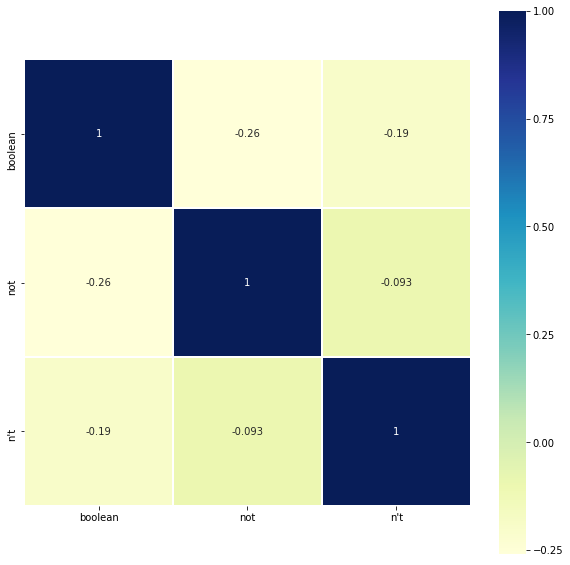

In [28]:
yelp_corr3 = yelp_raw3.corr()

plt.figure(figsize=(10,10))
sns.heatmap(yelp_corr3, square=True, linewidths=0.5, annot=True, cmap='YlGnBu')
plt.show()

In [29]:
yelp_raw3.drop('reviews', axis = 1, inplace=True)

In [30]:
data3 = yelp_raw3[keywords3]
target3 = yelp_raw3['boolean']

bnb3 = BernoulliNB()
y_pred3 = bnb3.fit(data3, target3).predict(data3)
print("The third classifier's number of mislabeled points out of a total {} points : {}".format(data3.shape[0], (target3 != y_pred3).sum()))

The third classifier's number of mislabeled points out of a total 1000 points : 359


Let's calculate the accuracy of my model

In [31]:
print("The accuracy of this model is {}%".format(round(((target3 == y_pred3).sum() / data3.shape[0])*100), 2))

The accuracy of this model is 64.0%


Now, Let's build confusion matrix and calculate sensitivity and specificity.

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, y_pred)

cm_sense = cm[1][1] / cm[1].sum()
print('The Sensitivity of my model is {}%'.format(cm_sense*100))

cm_spec = cm[0][0] / cm[0].sum()
print('The Specificity of my model is {}%'.format(cm_spec*100))

The Sensitivity of my model is 43.6%
The Specificity of my model is 93.60000000000001%


Now, let's cross-validation check for the model


In [33]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(data3, target3, test_size=0.2, random_state=20)
bnb3_yelp = bnb3.fit(X_train3, y_train3)
print('With 20% Holdout: ' + str(bnb3_yelp.score(X_test3, y_test3)))
print('Testing on Sample: ' + str(bnb3.fit(data3, target3).score(data3, target3)))

With 20% Holdout: 0.6
Testing on Sample: 0.641


In [34]:
from sklearn.model_selection import cross_val_score

cvs3 = cross_val_score(bnb3, data3, target3, cv=10)
print(cvs3)
print('The average of Cross-validation score is {}'.format(round(cvs3.mean(), 2)))

[0.64 0.63 0.7  0.59 0.63 0.6  0.65 0.62 0.67 0.68]
The average of Cross-validation score is 0.64


**1. Do any of your classifiers seem to overfit?**  
-> None of my classifiers are overfitted. Because the Cross-validation scores are not flutuated and relatively constant.

**2. Which seem to perform the best? Why?**  
-> The first and second model have 69% accuracy. But the first model has more value at sensitivity. In this reason, the first model has a best perfomance on this dataset.

**3. Which features seemed to be most impactful to performance?**  
-> Let's refer to the first classifier's keywords: 'wow', 'love', 'good', 'ever', 'great', 'well', 'like', 'recommended', 'delicious', 'amazing', 'performed', 'back', 'friendly', 'exellent'
Those are positive words. For the good reviews, the positive words make good reviews.